In [1]:
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import pylab as py 
from scipy.stats import pearsonr,spearmanr
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)


In [2]:
from sklearn import datasets

data = datasets.fetch_california_housing()
data=pd.DataFrame(data=data.data,columns=data.feature_names)



In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


<Axes: xlabel='HouseAge', ylabel='Count'>

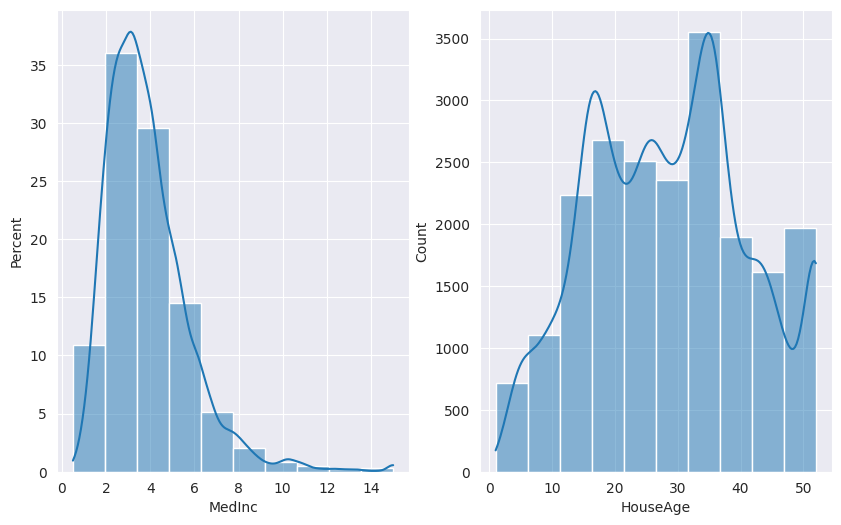

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["MedInc"],kde=True, 
             bins=10,ax=axs[0],stat="percent")
sns.histplot(data["HouseAge"], kde=True, 
             bins=10,ax=axs[1])


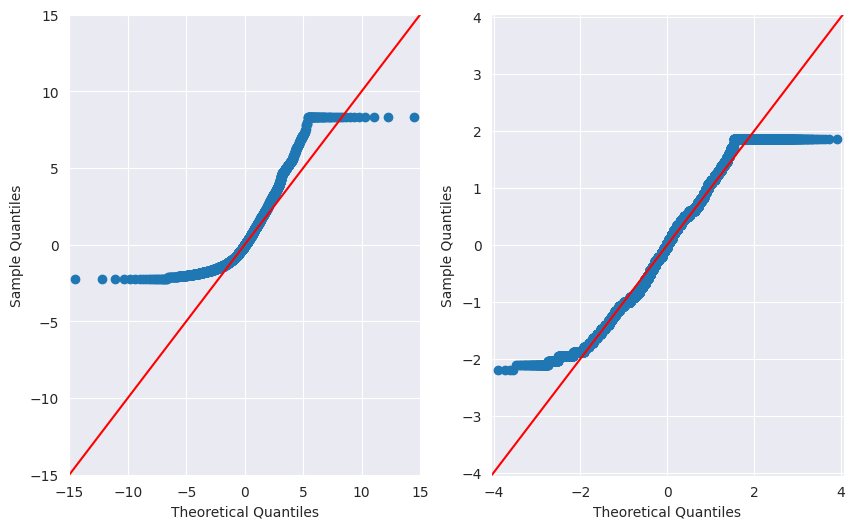

In [6]:

fig, axs = plt.subplots(nrows=1, ncols=2)
sm.qqplot(data["MedInc"], st.t, fit=True, line="45",ax=axs[0]) 
sm.qqplot(data["HouseAge"], st.t, fit=True, line="45",ax=axs[1]) 
py.show() 


In [7]:
st.shapiro(data["MedInc"])


ShapiroResult(statistic=np.float64(0.8932307509080386), pvalue=np.float64(6.560004141576977e-79))

BOX-COX TRANSFFORMATION

In [8]:
fitted_box_dataA, fitted_box_lambdaA = st.boxcox(data["MedInc"])
data["MedInc_boxCox"]=fitted_box_dataA

print(fitted_box_lambdaA)

0.090854472181


<Axes: ylabel='Percent'>

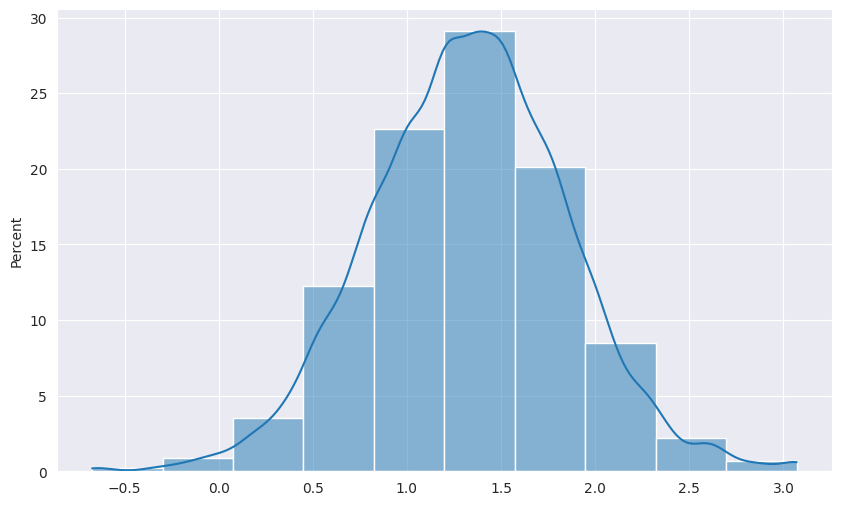

In [9]:


sns.histplot(fitted_box_dataA, kde=True,stat="percent",
             bins=10)


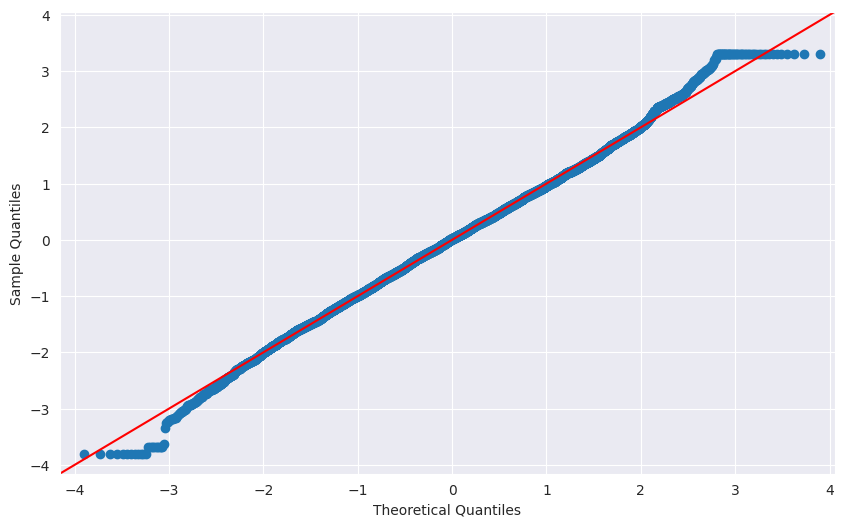

In [10]:



sm.qqplot(fitted_box_dataA, st.t, fit=True, line="45") 
py.show() 


In [11]:
st.shapiro(fitted_box_dataA)

ShapiroResult(statistic=np.float64(0.998249419571606), pvalue=np.float64(1.9013143751275995e-14))

[Text(0.5, 1.0, 'Plot of Transformed Median Income(BoxCox)'),
 Text(0.5, 0, 'Median Income(BoxCox)')]

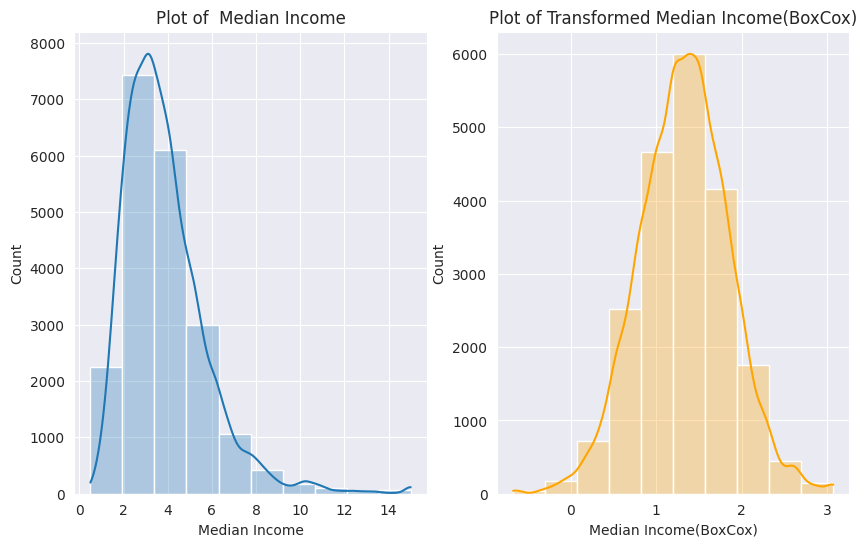

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["MedInc"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of  Median Income",xlabel="Median Income")
sns.histplot(data["MedInc_boxCox"],bins=10,kde=True,ax=axs[1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income(BoxCox)",xlabel="Median Income(BoxCox)")

YEO JOHNSON TRANSFORMATION

In [13]:
fitted_yeo_dataA,yeo_lambdaA=st.yeojohnson(data["MedInc"])
data["MedInc_yj"]=fitted_yeo_dataA
print(yeo_lambdaA)

-0.19850991136158044


<Axes: ylabel='Count'>

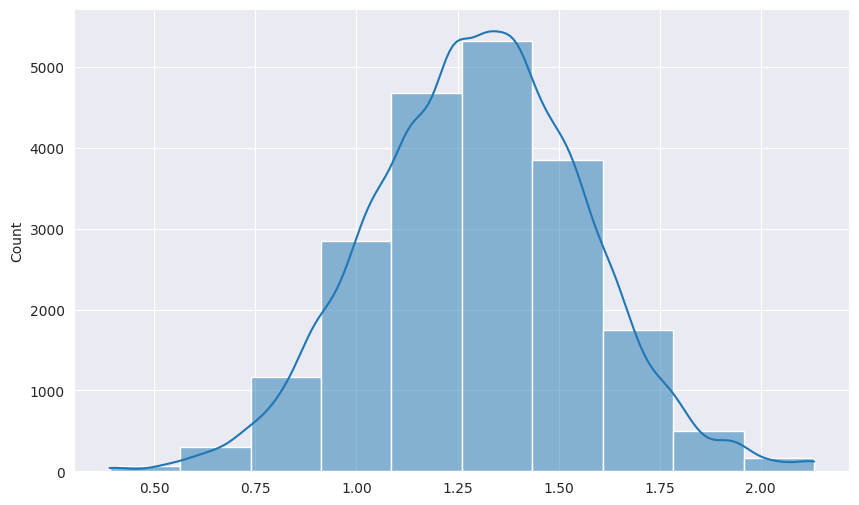

In [14]:
sns.histplot(fitted_yeo_dataA, kde=True, 
             bins=10)


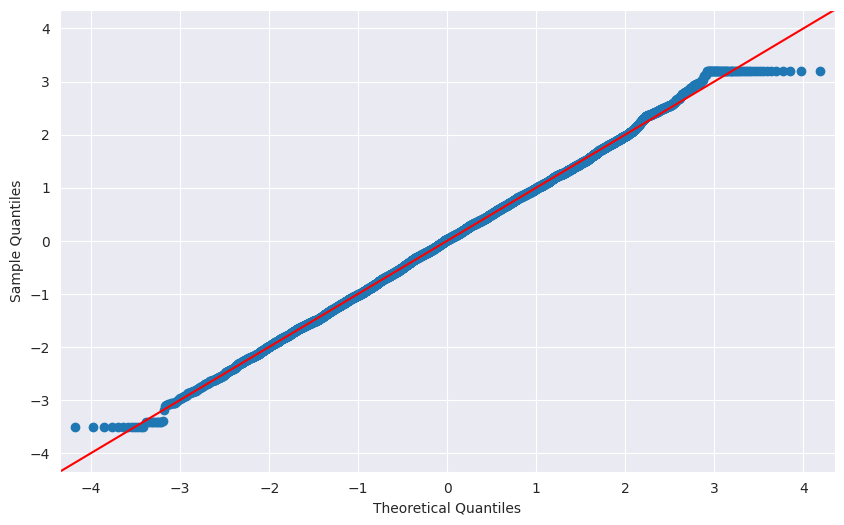

In [15]:


sm.qqplot(fitted_yeo_dataA, st.t, fit=True, line="45") 
py.show() 


In [16]:
st.shapiro(fitted_yeo_dataA)

ShapiroResult(statistic=np.float64(0.9992176364562855), pvalue=np.float64(3.879784997691618e-08))

[Text(0.5, 1.0, 'Plot of Transformed Median Income (Yeo-Johnson)'),
 Text(0.5, 0, 'Median Income(Yeo-Johnson)')]

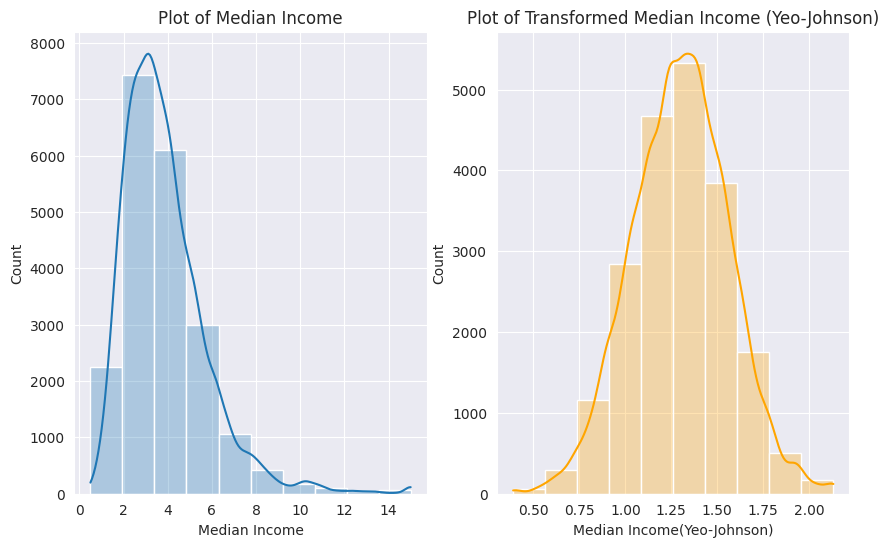

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["MedInc"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of Median Income",xlabel="Median Income")
sns.histplot(data["MedInc_yj"],ax=axs[1],bins=10,kde=True,color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income (Yeo-Johnson)",xlabel="Median Income(Yeo-Johnson)")

In [18]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_boxCox,MedInc_yj
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.337069,1.803599
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.333598,1.801958
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2.171690,1.724579
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1.873879,1.578385
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.432988,1.354895
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.453991,0.857611
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.979953,1.121673
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.543627,0.901462
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.642493,0.950502


[Text(0.5, 1.0, 'Plot of Transformed Median Income (Yeo-Johnson)'),
 Text(0.5, 0, 'Median Income(Yeo-Johnson)')]

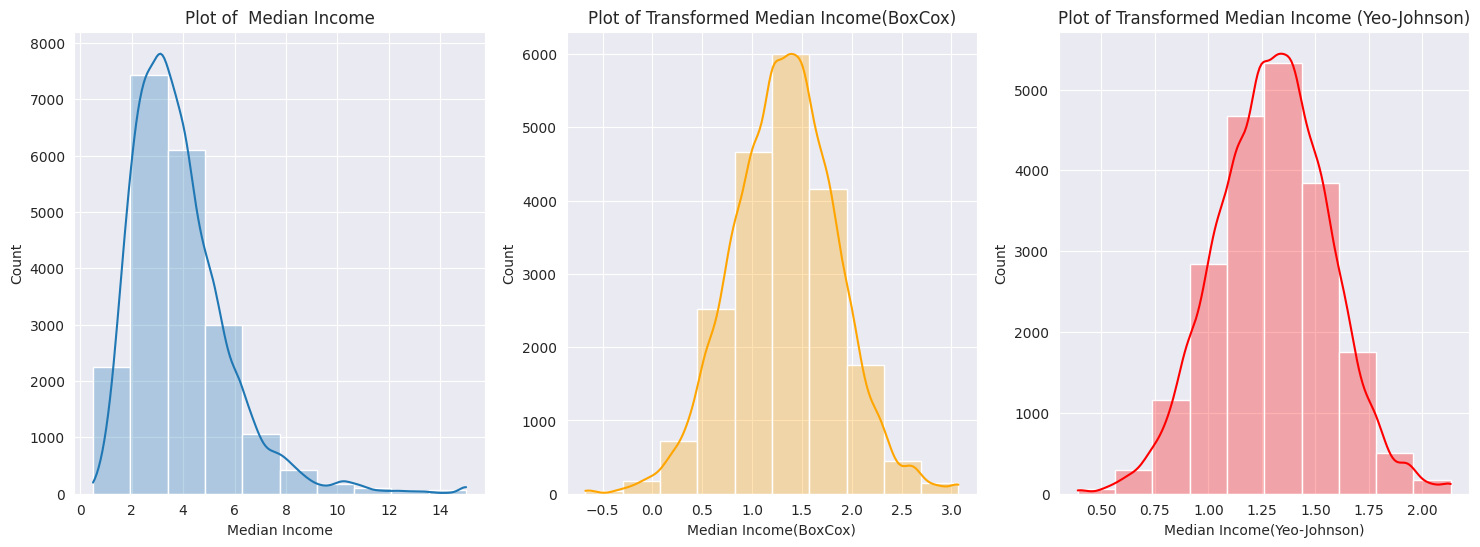

In [19]:
plt.rcParams["figure.figsize"] = (18,6)
fig, axs = plt.subplots(nrows=1, ncols=3)
sns.histplot(data["MedInc"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of  Median Income",xlabel="Median Income")
sns.histplot(data["MedInc_boxCox"],bins=10,kde=True,ax=axs[1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income(BoxCox)",xlabel="Median Income(BoxCox)")
sns.histplot(data["MedInc_yj"],ax=axs[2],bins=10,kde=True,color="red",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income (Yeo-Johnson)",xlabel="Median Income(Yeo-Johnson)")

In [20]:
plt.rcParams["figure.figsize"] = (10,6)


MinMax SCALE 

In [21]:
"""norm_dataA=(data["MedInc"]-min(data["MedInc"]))/(max(data["MedInc"])-min(data["MedInc"]))
"""
norm=MinMaxScaler((0,1)).fit(data[["MedInc","HouseAge"]])
norm_data=pd.DataFrame(norm.transform(data[["MedInc","HouseAge"]]),columns=["MedInc","HouseAge"])
data[["normalized_MedInc","normalized_HouseAge"]]=norm_data[["MedInc","HouseAge"]]


<Axes: xlabel='normalized_MedInc', ylabel='Count'>

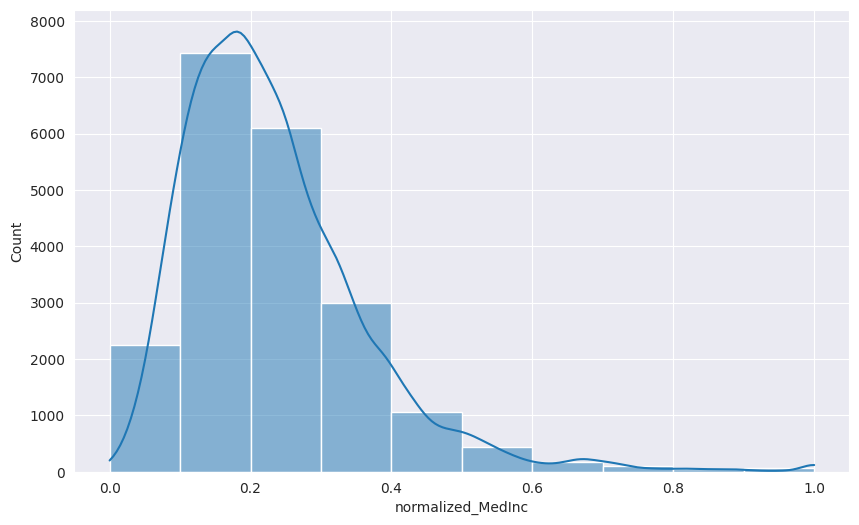

In [22]:
sns.histplot(data["normalized_MedInc"],  kde=True, 
             bins=10)


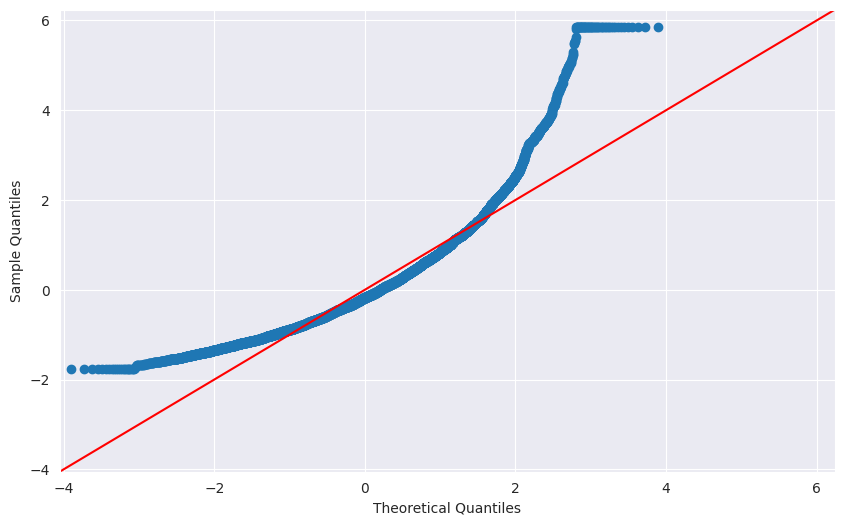

In [23]:
sm.qqplot(data["normalized_MedInc"], fit=True, line="45") 
py.show() 


In [24]:
st.shapiro(data["normalized_MedInc"])

ShapiroResult(statistic=np.float64(0.8932307509080383), pvalue=np.float64(6.560004141575668e-79))

In [25]:
st.shapiro(data["normalized_HouseAge"])

ShapiroResult(statistic=np.float64(0.9782468190531594), pvalue=np.float64(1.5602225615811627e-47))

[Text(0.5, 1.0, 'Plot of MinMax Scalling of Median Income'),
 Text(0.5, 0, 'Median Income')]

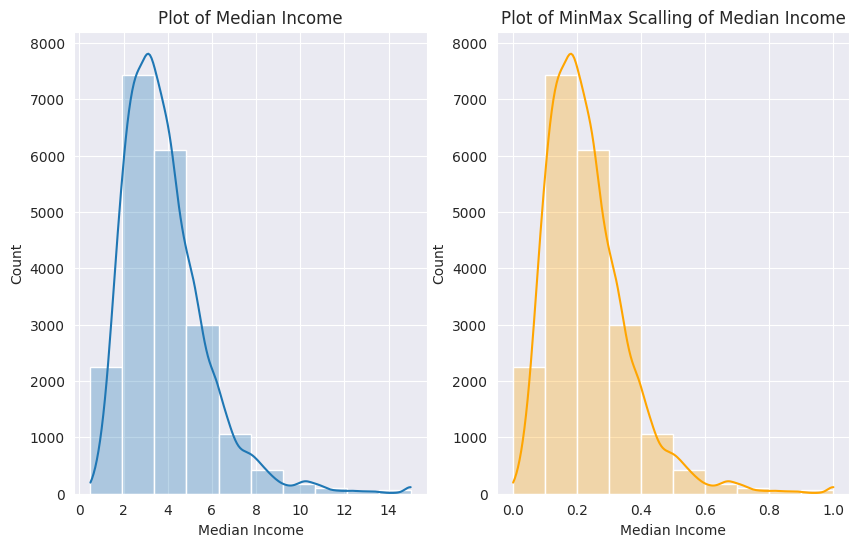

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["MedInc"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of Median Income",xlabel="Median Income")
sns.histplot(data["normalized_MedInc"],ax=axs[1],bins=10,kde=True,color="orange",alpha=0.3,edgecolor=None).set(title="Plot of MinMax Scalling of Median Income",xlabel="Median Income")

[Text(0.5, 1.0, 'Plot of MinMax Scalling of House Age'),
 Text(0.5, 0, 'House Age')]

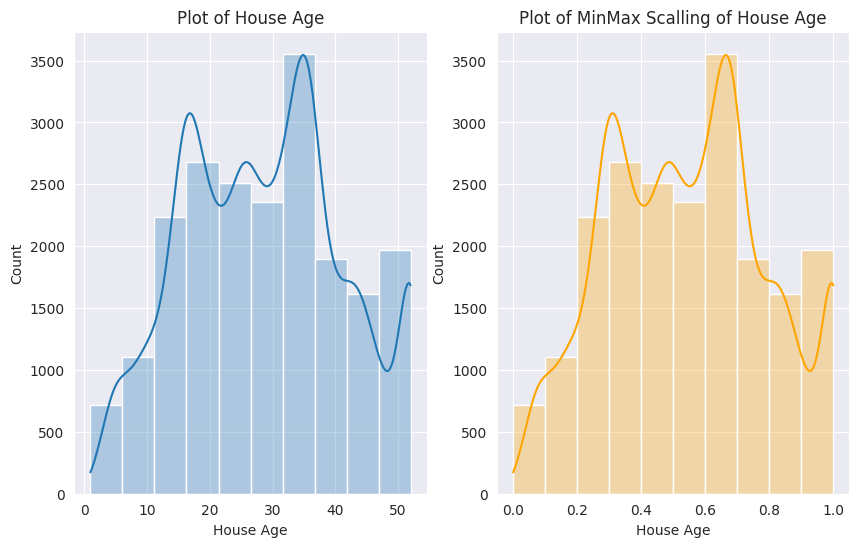

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["HouseAge"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of House Age",xlabel="House Age")
sns.histplot(data["normalized_HouseAge"],bins=10,kde=True,color="orange",ax=axs[1],alpha=0.3,edgecolor=None).set(title="Plot of MinMax Scalling of House Age",xlabel="House Age")

In [28]:
if data["normalized_MedInc"].min() <=0:
    data["posnormalized_MedInc"]=data["normalized_MedInc"]+ 0.00001

BoxCox-MinMax

0.32083788306918165


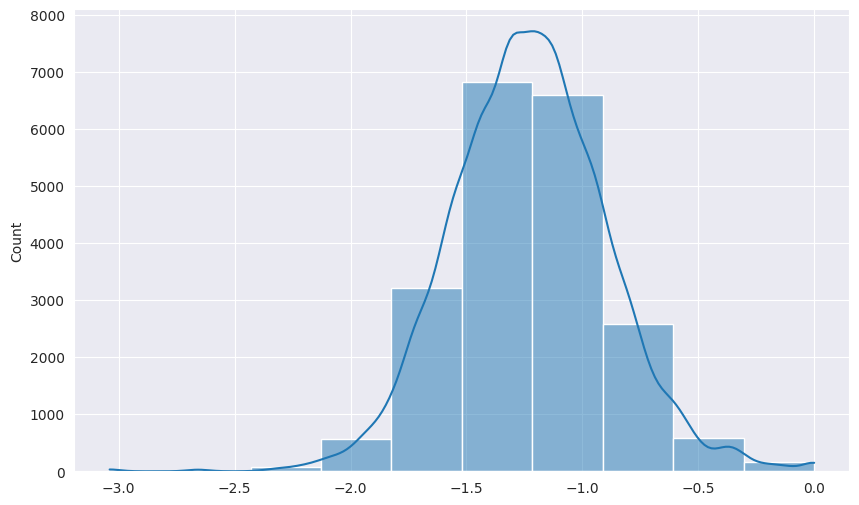

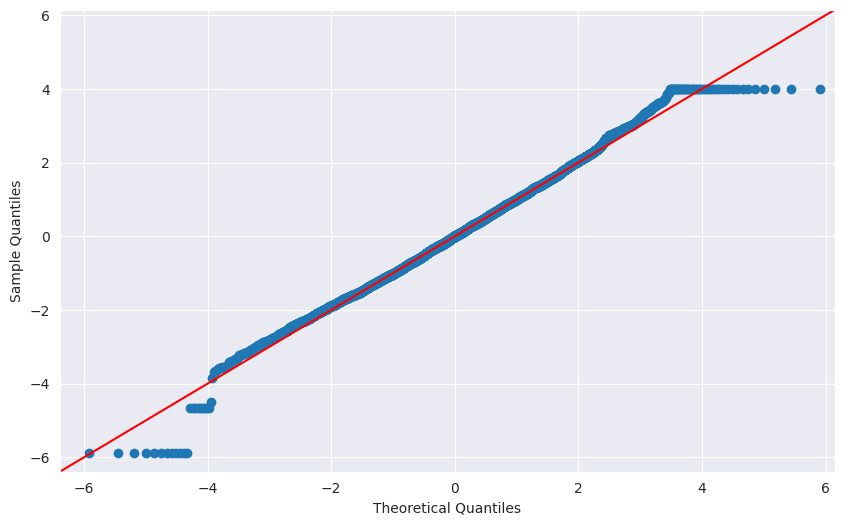

ShapiroResult(statistic=np.float64(0.9930889143251691), pvalue=np.float64(5.8578521271129885e-30))

In [29]:
fitted_box_normdataA, fitted_box_normlambdaA = st.boxcox(data["posnormalized_MedInc"])
data["normalized_MedInc_boxCox"]=fitted_box_normdataA

print(fitted_box_normlambdaA)

sns.histplot(fitted_box_normdataA, kde=True, 
             bins=10)

sm.qqplot(fitted_box_normdataA, st.t, fit=True, line="45") 
py.show() 

st.shapiro(fitted_box_normdataA)

[Text(0.5, 1.0, 'Plot of Transformed Median Income (MinMax, BoxCox)'),
 Text(0.5, 0, 'Median Income(MinMax)')]

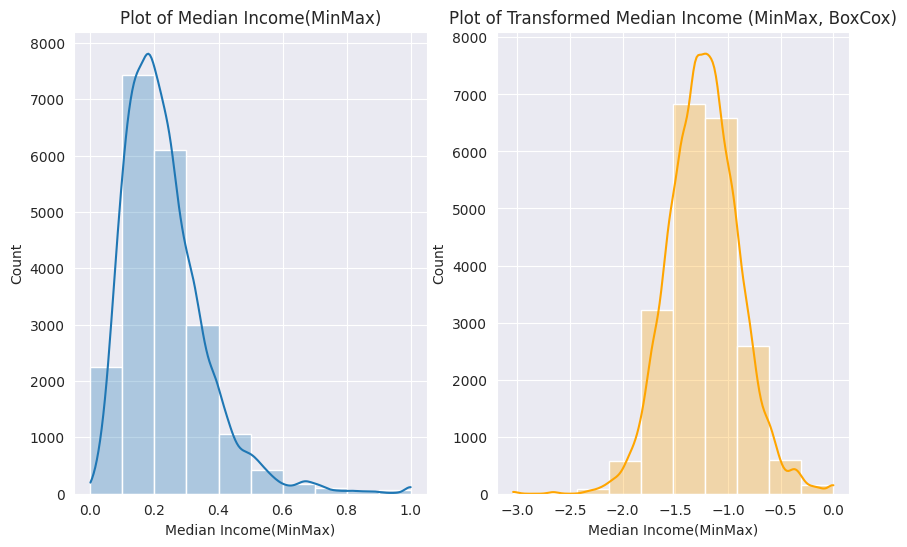

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["posnormalized_MedInc"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of Median Income(MinMax)",xlabel="Median Income(MinMax)")
sns.histplot(data["normalized_MedInc_boxCox"],bins=10,kde=True,ax=axs[1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income (MinMax, BoxCox)",xlabel="Median Income(MinMax)")

MinMax-YEO JOHNSON 

-3.2928838318076434


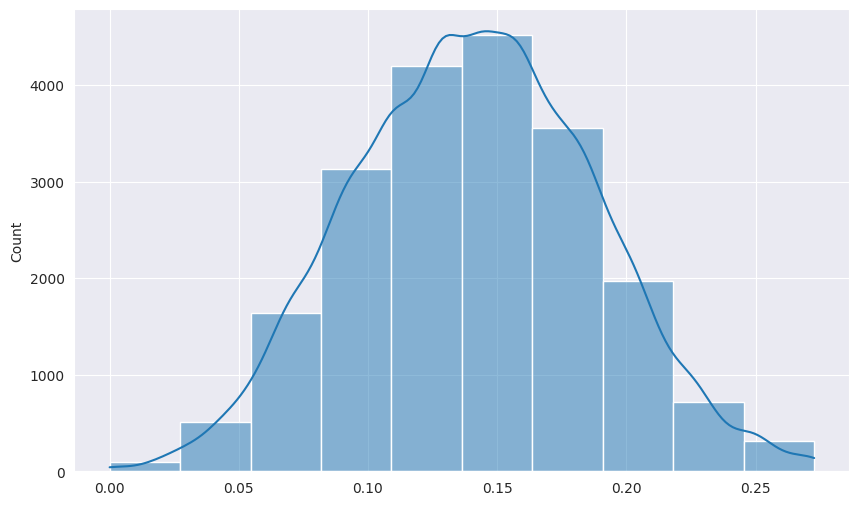

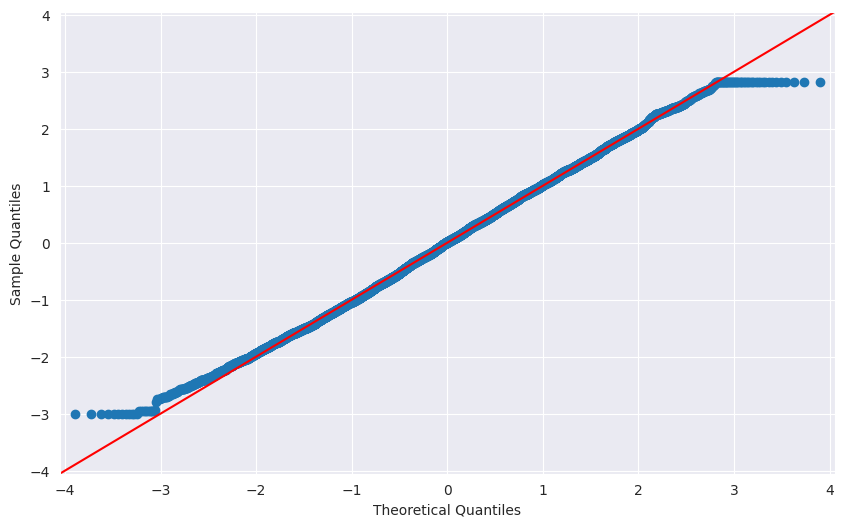

ShapiroResult(statistic=np.float64(0.998576236880427), pvalue=np.float64(1.2402498849298016e-12))

In [31]:

fitted_yeo_normdataA, fitted_yeo_normlambdaA = st.yeojohnson(data["normalized_MedInc"])
data["normalized_MedInc_yj"]=fitted_yeo_normdataA

print(fitted_yeo_normlambdaA)

sns.histplot(fitted_yeo_normdataA, kde=True, 
             bins=10)

sm.qqplot(fitted_yeo_normdataA, st.t, fit=True, line="45") 
py.show() 

st.shapiro(fitted_yeo_normdataA)


[Text(0.5, 1.0, 'Plot of Transformed Median Income (MinMax, Yeo-Johnson)'),
 Text(0.5, 0, 'Median Income(MinMax)')]

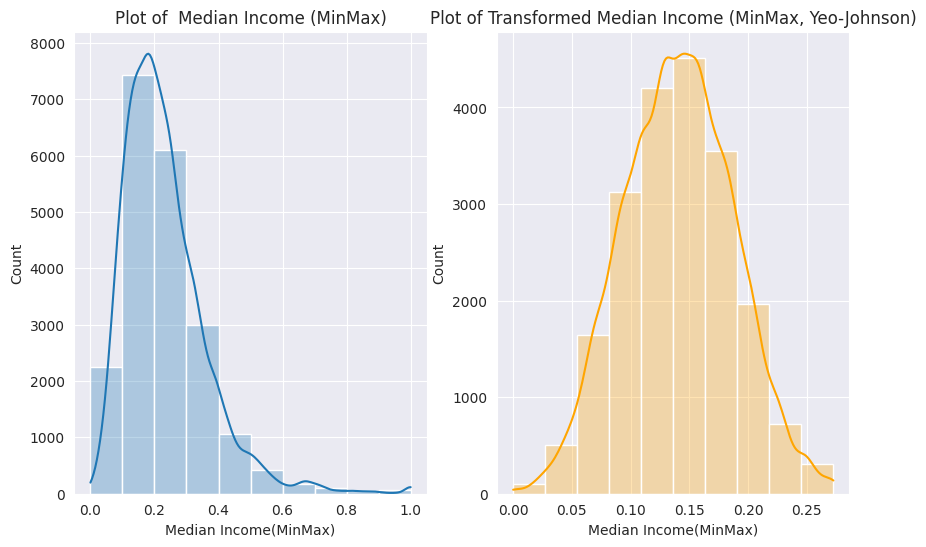

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["normalized_MedInc"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of  Median Income (MinMax)",xlabel="Median Income(MinMax)")
sns.histplot(data["normalized_MedInc_yj"],ax=axs[1],bins=10,color="orange",kde=True,alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income (MinMax, Yeo-Johnson)",xlabel="Median Income(MinMax)")

In [33]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_boxCox,MedInc_yj,normalized_MedInc,normalized_HouseAge,posnormalized_MedInc,normalized_MedInc_boxCox,normalized_MedInc_yj
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.337069,1.803599,0.539668,0.784314,0.539678,-0.559589,0.230361
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.333598,1.801958,0.538027,0.392157,0.538037,-0.562087,0.230103
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2.171690,1.724579,0.466028,1.000000,0.466038,-0.677167,0.217519
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1.873879,1.578385,0.354699,1.000000,0.354709,-0.881743,0.191927
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.432988,1.354895,0.230776,1.000000,0.230786,-1.169651,0.150409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.453991,0.857611,0.073130,0.470588,0.073140,-1.770072,0.062978
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.979953,1.121673,0.141853,0.333333,0.141863,-1.451119,0.107476
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.543627,0.901462,0.082764,0.313725,0.082774,-1.715528,0.069959
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.642493,0.950502,0.094295,0.333333,0.094305,-1.655649,0.077971


[Text(0.5, 1.0, 'Plot of Transformed Median Income (MinMax, Yeo-Johnson)'),
 Text(0.5, 0, 'Median Income(MinMax)')]

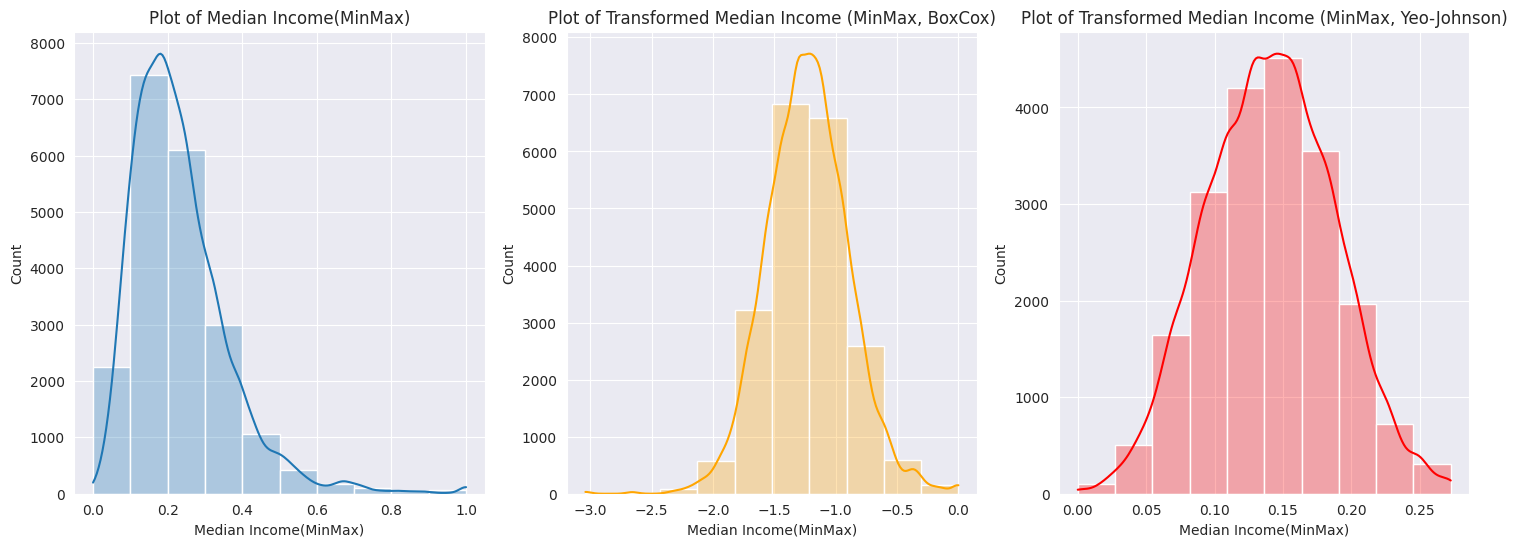

In [34]:
plt.rcParams["figure.figsize"] = (18,6)
fig, axs = plt.subplots(nrows=1, ncols=3)
sns.histplot(data["posnormalized_MedInc"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of Median Income(MinMax)",xlabel="Median Income(MinMax)")
sns.histplot(data["normalized_MedInc_boxCox"],bins=10,kde=True,ax=axs[1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income (MinMax, BoxCox)",xlabel="Median Income(MinMax)")
sns.histplot(data["normalized_MedInc_yj"],ax=axs[2],bins=10,color="red",kde=True,alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income (MinMax, Yeo-Johnson)",xlabel="Median Income(MinMax)")

Standardize

In [35]:
stnd=StandardScaler().fit(data[["MedInc","HouseAge"]])
stnd_data=pd.DataFrame(stnd.transform(data[["MedInc","HouseAge"]]),columns=["MedInc","HouseAge"])
data[["standardizeMedInc","standardizeHouseAge"]]=stnd_data[["MedInc","HouseAge"]]

<Axes: xlabel='standardizeMedInc', ylabel='Count'>

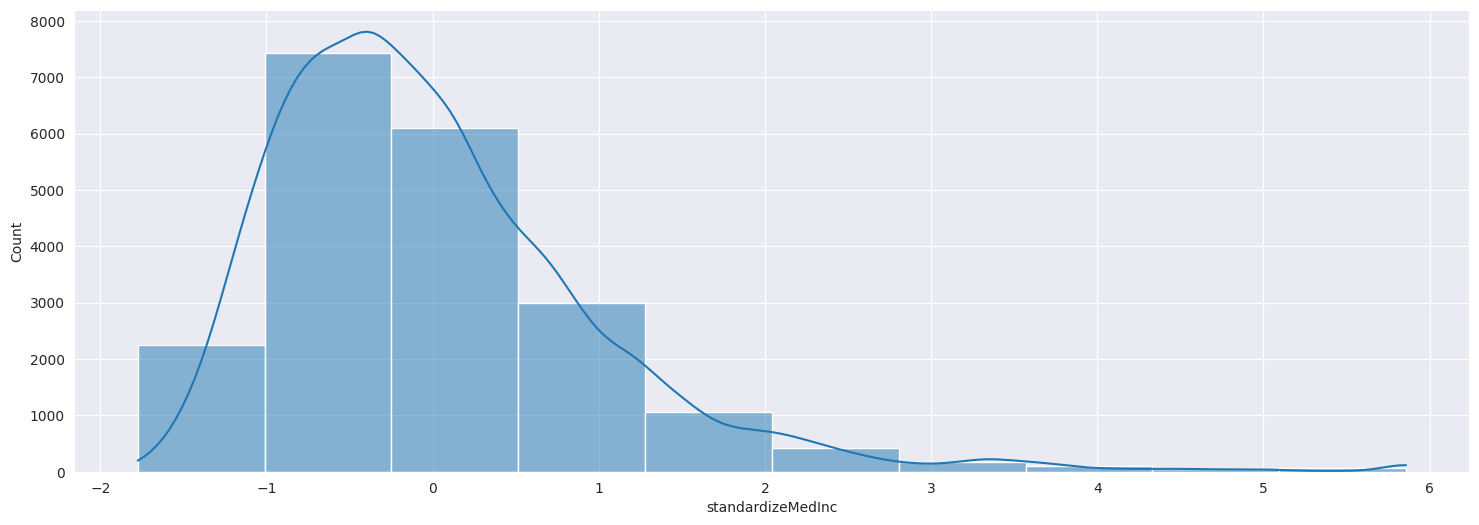

In [36]:
sns.histplot(data["standardizeMedInc"], kde=True, 
             bins=10)


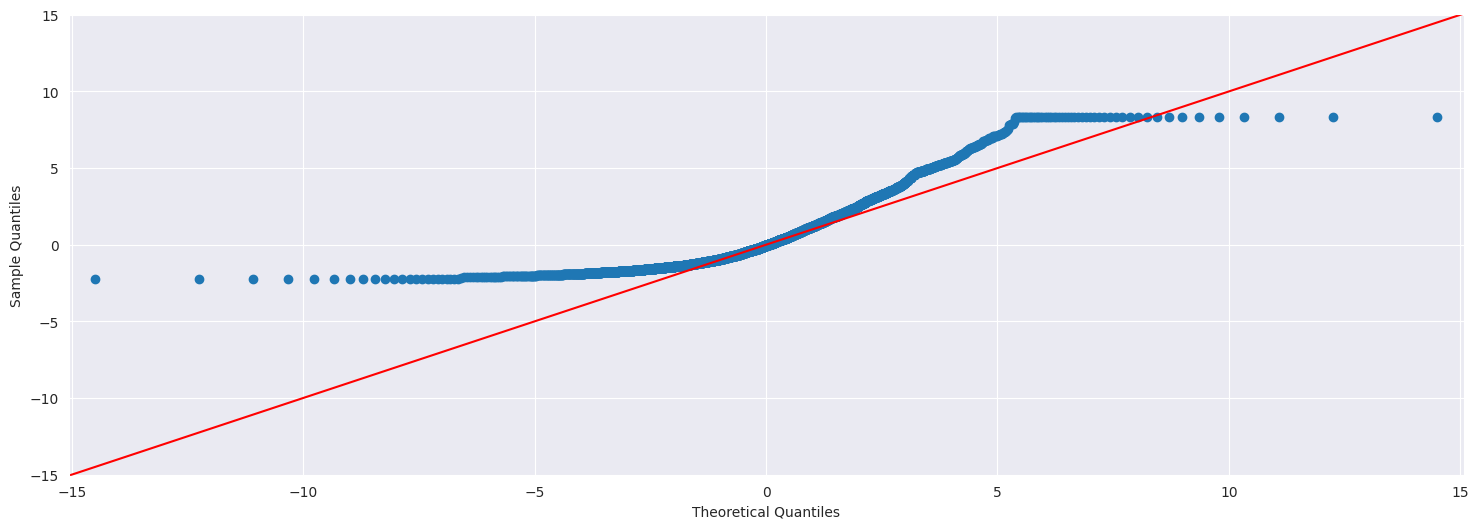

In [37]:
sm.qqplot(data["standardizeMedInc"], st.t, fit=True, line="45") 
py.show() 


In [38]:
st.shapiro(data["standardizeMedInc"])

ShapiroResult(statistic=np.float64(0.8932307509080386), pvalue=np.float64(6.560004141576977e-79))

In [39]:
st.shapiro(data["standardizeHouseAge"])

ShapiroResult(statistic=np.float64(0.978246819053159), pvalue=np.float64(1.560222561580004e-47))

In [40]:

if data["standardizeMedInc"].min() <=0:
    data["posstandardizeMedInc"]= data["standardizeMedInc"]+(abs(data["standardizeMedInc"].min()) + 0.00001)

[Text(0.5, 1.0, 'Plot of Standard Scalling of Median Income'),
 Text(0.5, 0, 'Median Income')]

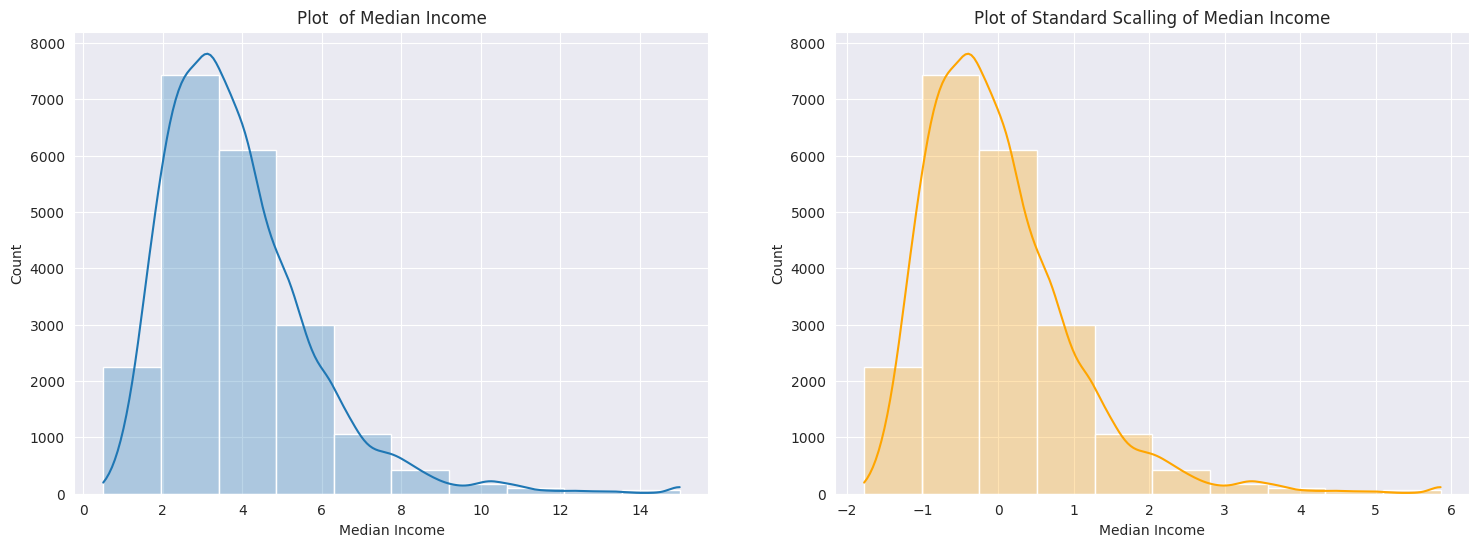

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["MedInc"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot  of Median Income",xlabel="Median Income")
sns.histplot(data["standardizeMedInc"],bins=10,kde=True,color="orange",ax=axs[1],alpha=0.3,edgecolor=None).set(title="Plot of Standard Scalling of Median Income",xlabel="Median Income")

[Text(0.5, 1.0, 'Plot of Standard Scalling of House Age'),
 Text(0.5, 0, 'House Age')]

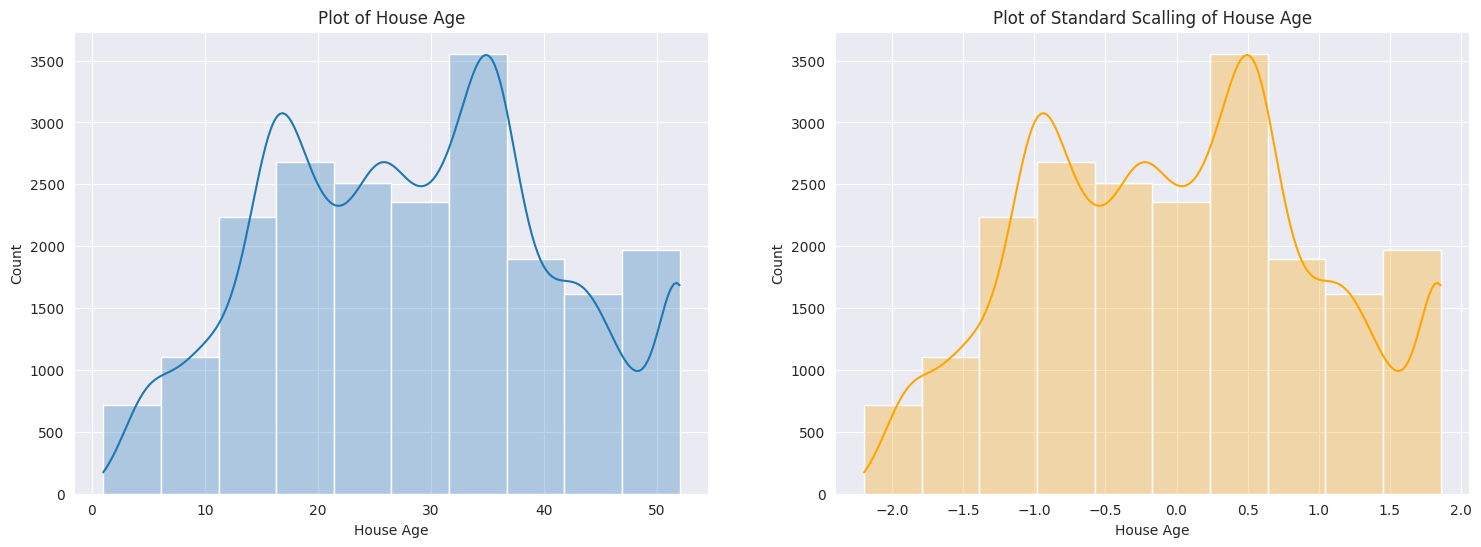

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["HouseAge"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of House Age",xlabel="House Age")
sns.histplot(data["standardizeHouseAge"],bins=10,kde=True,color="orange",ax=axs[1],alpha=0.3,edgecolor=None).set(title="Plot of Standard Scalling of House Age",xlabel="House Age")

STANDARDIZED BOXCOX

0.32441624360059046


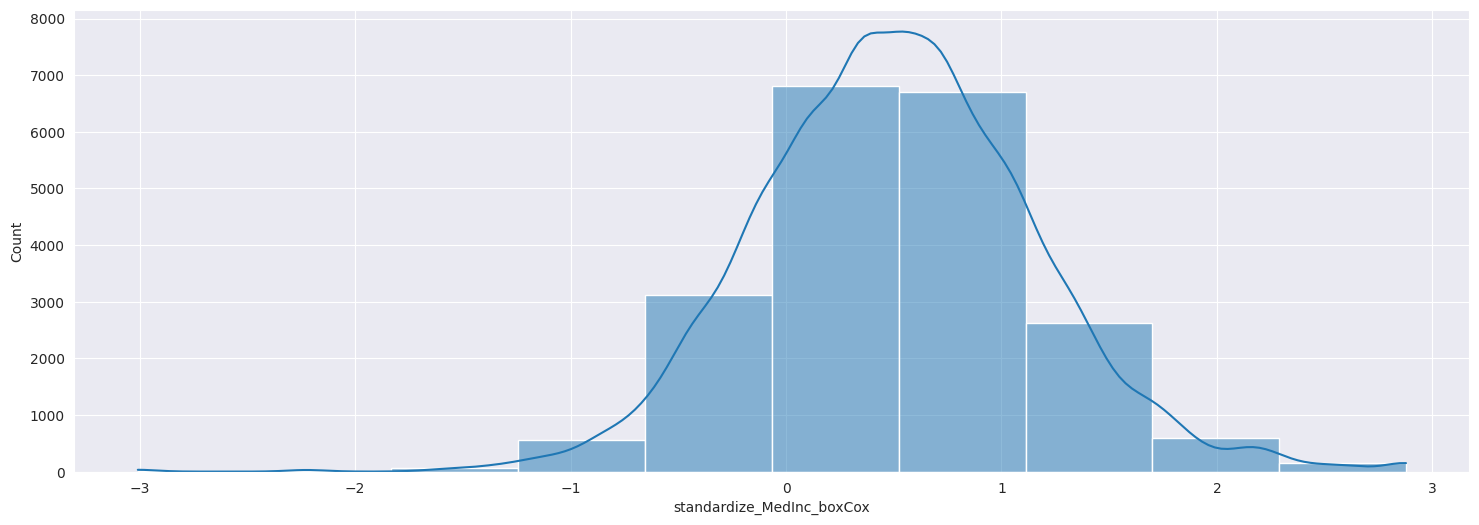

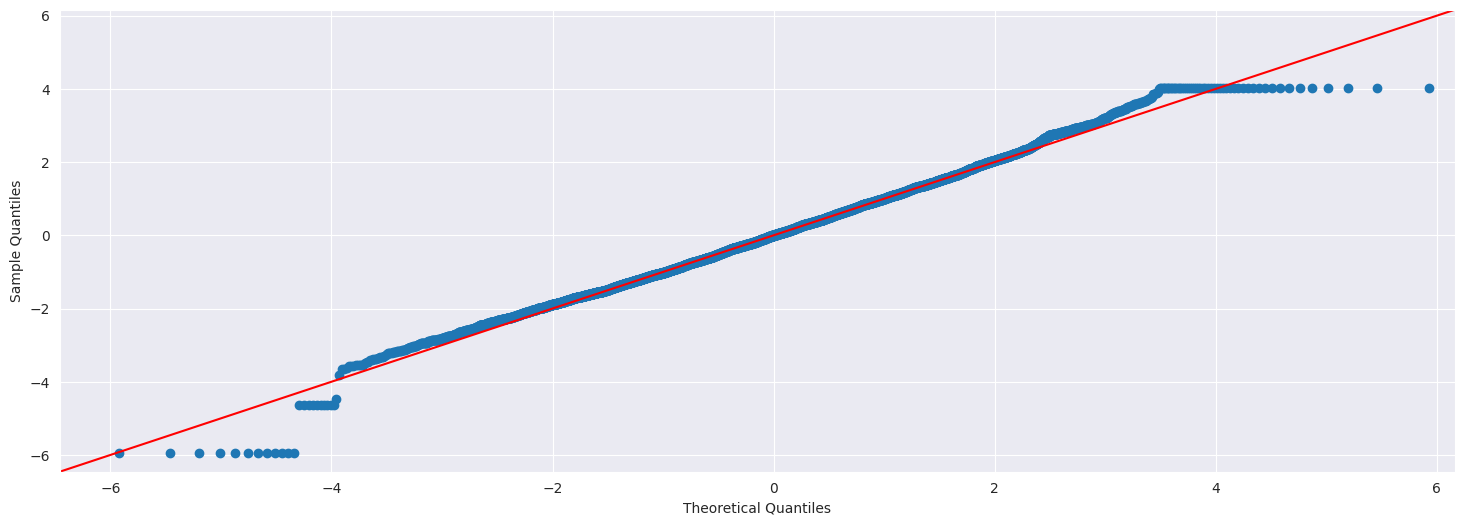

ShapiroResult(statistic=np.float64(0.9928838425408506), pvalue=np.float64(2.3546180144762656e-30))

In [43]:

fitted_box_stdataA, fitted_box_stlambdaA = st.boxcox(data["posstandardizeMedInc"])
data["standardize_MedInc_boxCox"]=fitted_box_stdataA

print(fitted_box_stlambdaA)

sns.histplot(data["standardize_MedInc_boxCox"], kde=True, 
             bins=10)

sm.qqplot(data["standardize_MedInc_boxCox"], st.t, fit=True, line="45") 
py.show() 

st.shapiro(data["standardize_MedInc_boxCox"])

[Text(0.5, 1.0, 'Plot of Transformed Median Income (Standard, BoxCox)'),
 Text(0.5, 0, 'Median Income(Standard)')]

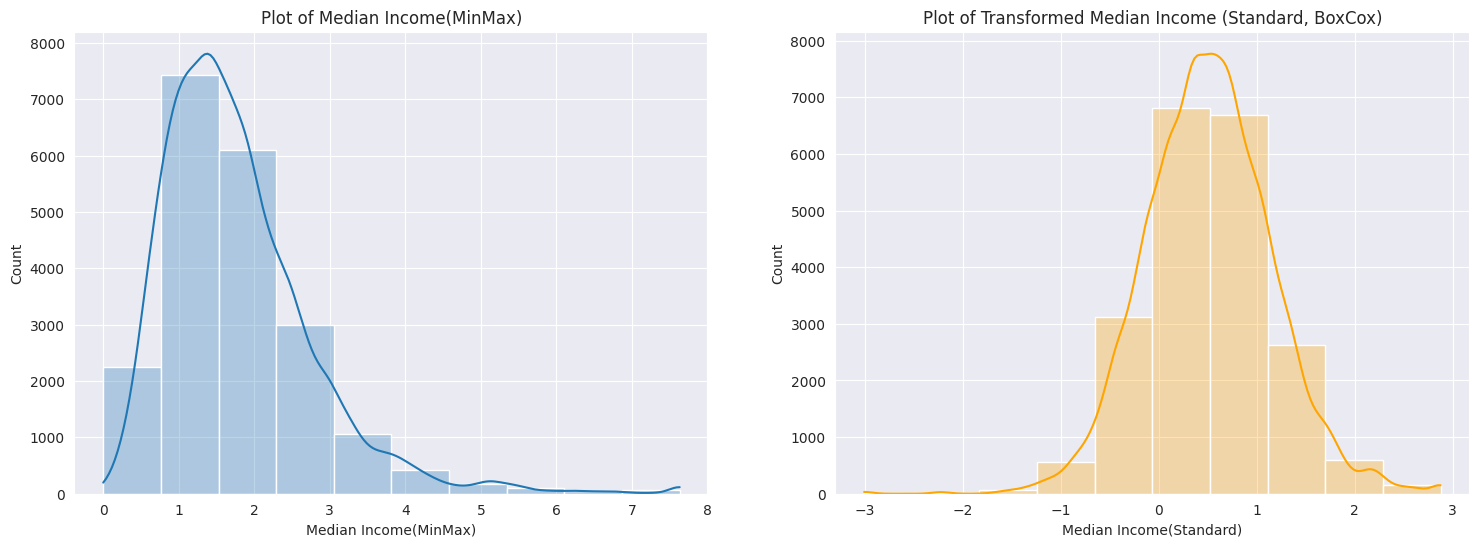

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["posstandardizeMedInc"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of Median Income(MinMax)",xlabel="Median Income(MinMax)")
sns.histplot(data["standardize_MedInc_boxCox"],bins=10,kde=True,ax=axs[1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income (Standard, BoxCox)",xlabel="Median Income(Standard)")

STANDARDIZED YEO JOHNSON 

0.28569820530365125


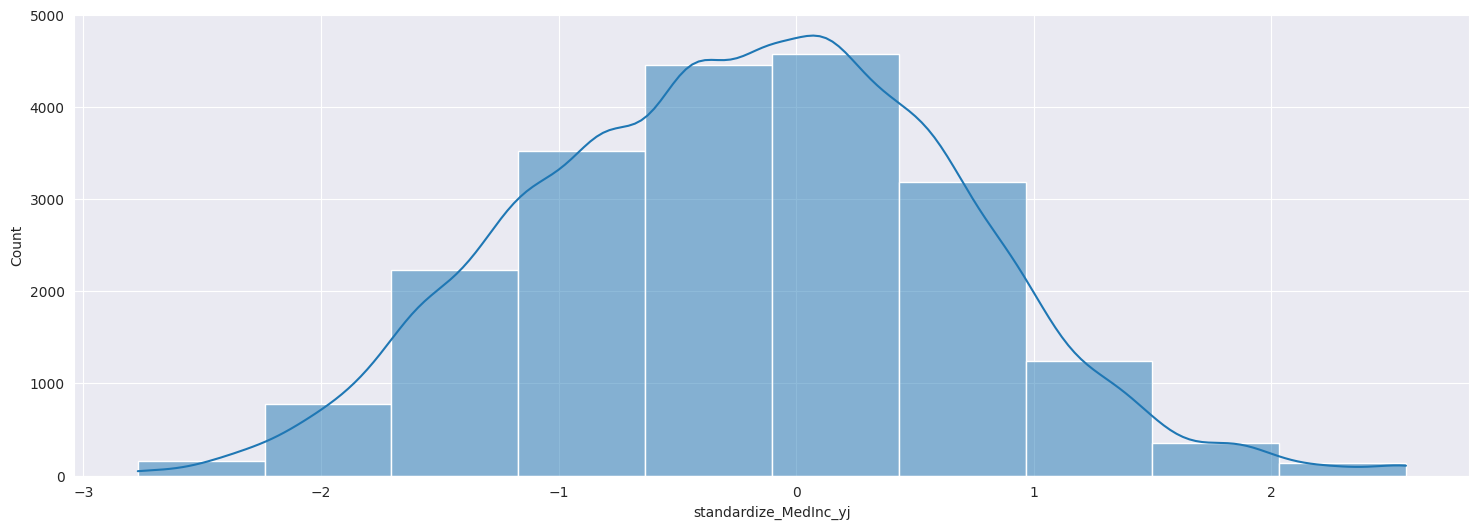

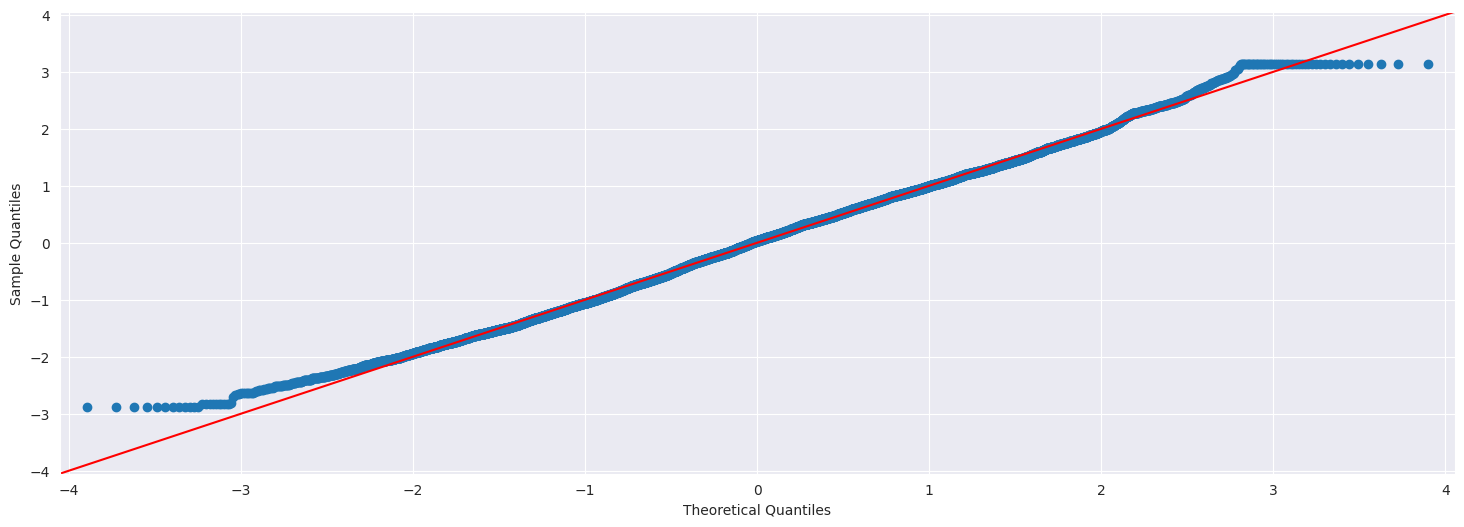

ShapiroResult(statistic=np.float64(0.9977730050429803), pvalue=np.float64(9.876108970169127e-17))

In [45]:

fitted_box_stdataA, fitted_box_stlambdaA = st.yeojohnson(data["standardizeMedInc"])
data["standardize_MedInc_yj"]=fitted_box_stdataA

print(fitted_box_stlambdaA)

sns.histplot(data["standardize_MedInc_yj"], kde=True, 
             bins=10)

sm.qqplot(data["standardize_MedInc_yj"], st.t, fit=True, line="45") 
py.show() 

st.shapiro(data["standardize_MedInc_yj"])

[Text(0.5, 1.0, 'Plot of Transformed Median Income (Standard, Yeo-Johnson)'),
 Text(0.5, 0, 'Median Income(Standard)')]

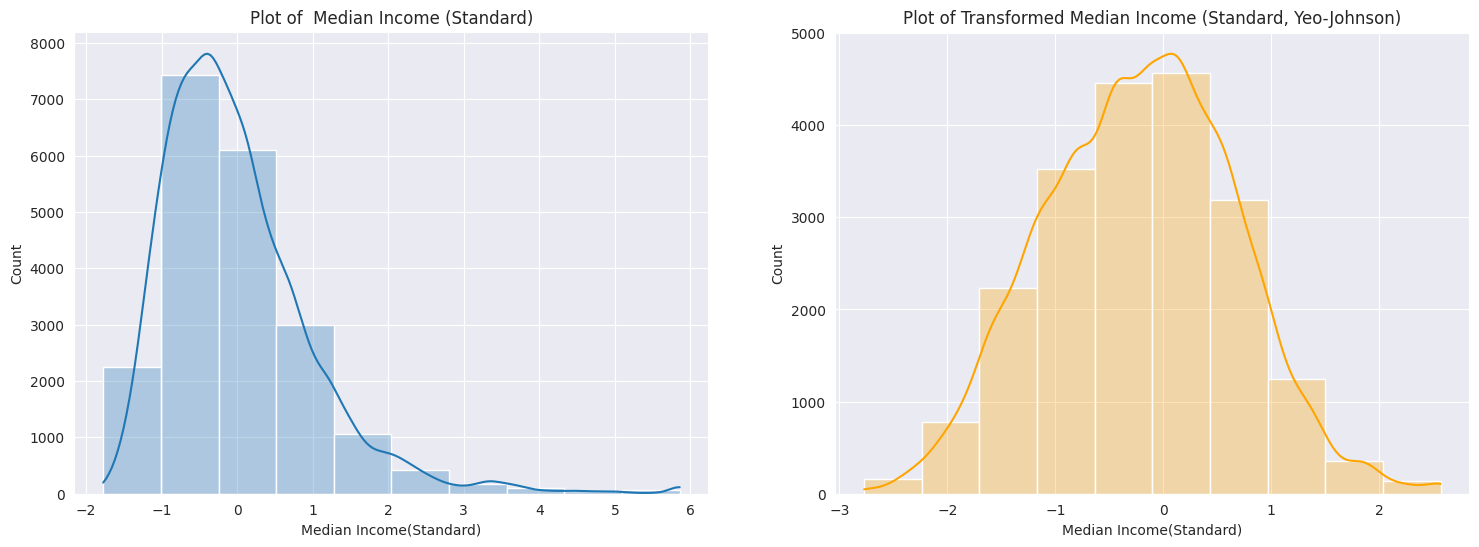

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["standardizeMedInc"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of  Median Income (Standard)",xlabel="Median Income(Standard)")
sns.histplot(data["standardize_MedInc_yj"],ax=axs[1],bins=10,kde=True,alpha=0.3,edgecolor=None,color="orange").set(title="Plot of Transformed Median Income (Standard, Yeo-Johnson)",xlabel="Median Income(Standard)")

In [47]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_boxCox,MedInc_yj,normalized_MedInc,normalized_HouseAge,posnormalized_MedInc,normalized_MedInc_boxCox,normalized_MedInc_yj,standardizeMedInc,standardizeHouseAge,posstandardizeMedInc,standardize_MedInc_boxCox,standardize_MedInc_yj
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.337069,1.803599,0.539668,0.784314,0.539678,-0.559589,0.230361,2.344766,0.982143,4.119075,1.796738,1.441804
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.333598,1.801958,0.538027,0.392157,0.538037,-0.562087,0.230103,2.332238,-0.607019,4.106547,1.791919,1.436509
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2.171690,1.724579,0.466028,1.000000,0.466038,-0.677167,0.217519,1.782699,1.856182,3.557009,1.569954,1.188754
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1.873879,1.578385,0.354699,1.000000,0.354709,-0.881743,0.191927,0.932968,1.856182,2.707277,1.175662,0.725188
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.432988,1.354895,0.230776,1.000000,0.230786,-1.169651,0.150409,-0.012881,1.856182,1.761428,0.621447,-0.012940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.453991,0.857611,0.073130,0.470588,0.073140,-1.770072,0.062978,-1.216128,-0.289187,0.558181,-0.531244,-1.698940
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.979953,1.121673,0.141853,0.333333,0.141863,-1.451119,0.107476,-0.691593,-0.845393,1.082717,0.080507,-0.853089
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.543627,0.901462,0.082764,0.313725,0.082774,-1.715528,0.069959,-1.142593,-0.924851,0.631716,-0.426732,-1.570660
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.642493,0.950502,0.094295,0.333333,0.094305,-1.655649,0.077971,-1.054583,-0.845393,0.719727,-0.311946,-1.421216


[Text(0.5, 1.0, 'Plot of Transformed Median Income (Standard, Yeo-Johnson)'),
 Text(0.5, 0, 'Median Income(Standard)')]

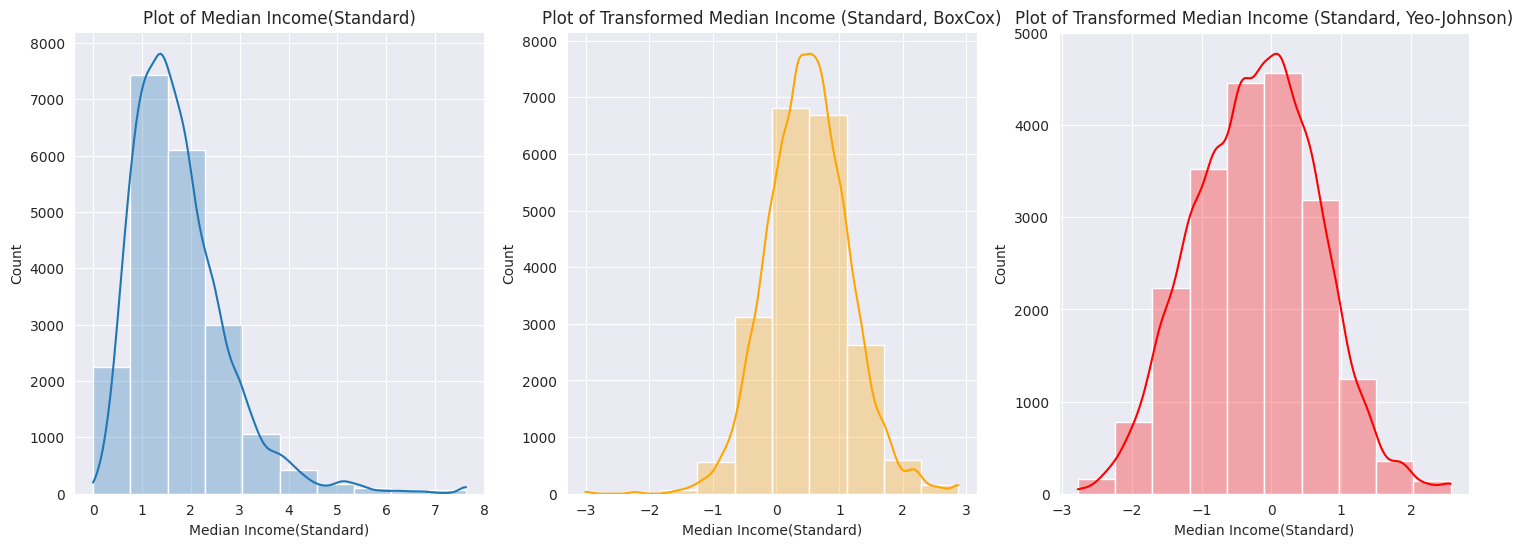

In [48]:
plt.rcParams["figure.figsize"] = (18,6)
fig, axs = plt.subplots(nrows=1, ncols=3)
sns.histplot(data["posstandardizeMedInc"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of Median Income(Standard)",xlabel="Median Income(Standard)")
sns.histplot(data["standardize_MedInc_boxCox"],bins=10,kde=True,ax=axs[1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income (Standard, BoxCox)",xlabel="Median Income(Standard)")
sns.histplot(data["standardize_MedInc_yj"],ax=axs[2],bins=10,kde=True,alpha=0.3,edgecolor=None,color="red").set(title="Plot of Transformed Median Income (Standard, Yeo-Johnson)",xlabel="Median Income(Standard)")

Summary

In [49]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_boxCox,MedInc_yj,normalized_MedInc,normalized_HouseAge,posnormalized_MedInc,normalized_MedInc_boxCox,normalized_MedInc_yj,standardizeMedInc,standardizeHouseAge,posstandardizeMedInc,standardize_MedInc_boxCox,standardize_MedInc_yj
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,1.328795,1.300473,0.232464,0.541951,0.232474,-1.227760,0.140785,6.609700e-17,5.508083e-18,1.774309,0.510316,-0.217188
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,0.526172,0.264352,0.131020,0.246776,0.131020,0.339114,0.046905,1.000024e+00,1.000024e+00,1.000024,0.652150,0.886507
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,-0.671960,0.389515,0.000000,0.000000,0.000010,-3.039299,0.000000,-1.774299e+00,-2.196180e+00,0.000010,-3.008870,-2.771045
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,0.982761,1.123114,0.142308,0.333333,0.142318,-1.449406,0.107733,-6.881186e-01,-8.453931e-01,1.086191,0.083796,-0.848036
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.337932,1.306023,0.209301,0.549020,0.209311,-1.229724,0.141262,-1.767951e-01,2.864572e-02,1.597514,0.505918,-0.187780
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,1.672189,1.476979,0.292641,0.705882,0.292651,-1.015485,0.173266,4.593063e-01,6.643103e-01,2.233616,0.918106,0.399123
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,3.070290,2.132255,1.000000,1.000000,1.000010,0.000010,0.272699,5.858286e+00,1.856182e+00,7.632595,2.877600,2.567135


In [50]:
print("Correlation (RAW): " + str(pearsonr(data["MedInc"], data["HouseAge"])[0]))
print("Correlation (Norm): " + str(pearsonr(data["normalized_MedInc"], data["normalized_HouseAge"])[0]))
print("Correlation (Stan): " + str(pearsonr(data["standardizeMedInc"], data["standardizeHouseAge"])[0]))
print("Box Cox Transformation (RAW): " + str(str(pearsonr(data["MedInc_boxCox"], data["normalized_HouseAge"])[0])))
print("Box Cox Transformation (Norm): " + str(str(pearsonr(data["normalized_MedInc_boxCox"], data["normalized_HouseAge"])[0])))
print("Box Cox Transformation (Stan): " + str(str(pearsonr(data["standardize_MedInc_boxCox"], data["normalized_HouseAge"])[0])))
print("Yeo Johnson Transformation (RAW): " + str(str(pearsonr(data["MedInc_yj"], data["normalized_HouseAge"])[0])))
print("Yeo Johnson Transformation (Norm): " + str(str(pearsonr(data["normalized_MedInc_yj"], data["normalized_HouseAge"])[0])))
print("Yeo Johnson Transformation (Stan): " + str(str(pearsonr(data["standardize_MedInc_yj"], data["normalized_HouseAge"])[0])))

Correlation (RAW): -0.11903398993785669
Correlation (Norm): -0.11903398993785669
Correlation (Stan): -0.11903398993785667
Box Cox Transformation (RAW): -0.13861141907629856
Box Cox Transformation (Norm): -0.13632724705944135
Box Cox Transformation (Stan): -0.13627566137337138
Yeo Johnson Transformation (RAW): -0.1399201728358679
Yeo Johnson Transformation (Norm): -0.14247032450242741
Yeo Johnson Transformation (Stan): -0.14042099307670894


In [51]:
print("Correlation (RAW): " + str(spearmanr(data["MedInc"], data["HouseAge"])[0]))
print("Correlation (Norm): " + str(spearmanr(data["normalized_MedInc"], data["normalized_HouseAge"])[0]))
print("Correlation (Stan): " + str(spearmanr(data["standardizeMedInc"], data["standardizeHouseAge"])[0]))
print("Box Cox Transformation (RAW): " + str(str(spearmanr(data["MedInc_boxCox"], data["normalized_HouseAge"])[0])))
print("Box Cox Transformation (Norm): " + str(str(spearmanr(data["normalized_MedInc_boxCox"], data["normalized_HouseAge"])[0])))
print("Box Cox Transformation (Stan): " + str(str(spearmanr(data["standardize_MedInc_boxCox"], data["normalized_HouseAge"])[0])))
print("Yeo Johnson Transformation (RAW): " + str(str(spearmanr(data["MedInc_yj"], data["normalized_HouseAge"])[0])))
print("Yeo Johnson Transformation (Norm): " + str(str(spearmanr(data["normalized_MedInc_yj"], data["normalized_HouseAge"])[0])))
print("Yeo Johnson Transformation (Stan): " + str(str(spearmanr(data["standardize_MedInc_yj"], data["normalized_HouseAge"])[0])))

Correlation (RAW): -0.1473079012915886
Correlation (Norm): -0.1473079012915886
Correlation (Stan): -0.1473079012915886
Box Cox Transformation (RAW): -0.1473079012915886
Box Cox Transformation (Norm): -0.1473079012915886
Box Cox Transformation (Stan): -0.1473079012915886
Yeo Johnson Transformation (RAW): -0.1473079012915886
Yeo Johnson Transformation (Norm): -0.1473079012915886
Yeo Johnson Transformation (Stan): -0.1473079012915886


[Text(0.5, 1.0, 'Plot of Transformed Median Income (Standard, Yeo-Johnson)'),
 Text(0.5, 0, 'Median Income(Standard)')]

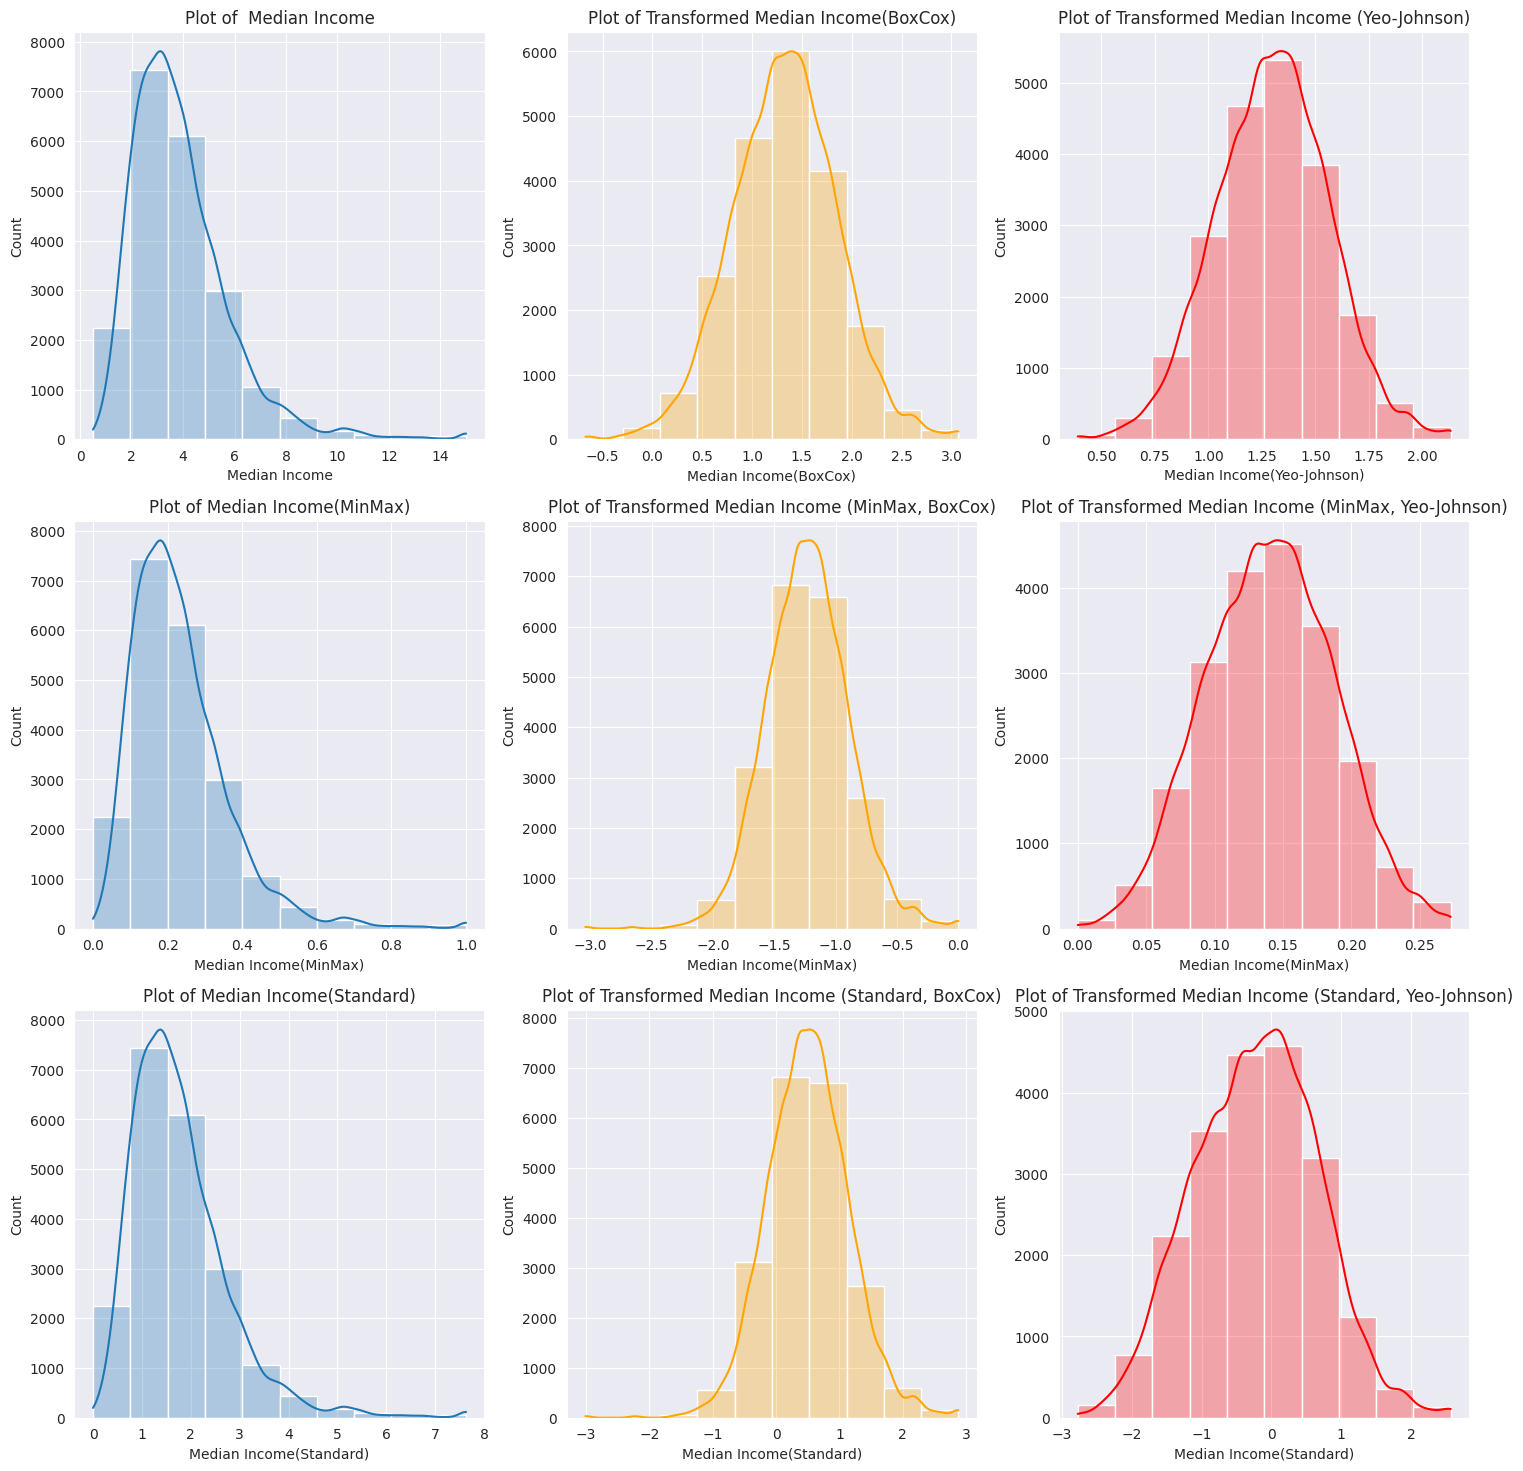

In [52]:
plt.rcParams["figure.figsize"] = (18,18)
fig, axs = plt.subplots(nrows=3, ncols=3)
sns.histplot(data["MedInc"],bins=10,kde=True,ax=axs[0,0],alpha=0.3,edgecolor=None).set(title="Plot of  Median Income",xlabel="Median Income")
sns.histplot(data["MedInc_boxCox"],bins=10,kde=True,ax=axs[0,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income(BoxCox)",xlabel="Median Income(BoxCox)")
sns.histplot(data["MedInc_yj"],ax=axs[0,2],bins=10,kde=True,color="red",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income (Yeo-Johnson)",xlabel="Median Income(Yeo-Johnson)")
sns.histplot(data["posnormalized_MedInc"],bins=10,kde=True,ax=axs[1,0],alpha=0.3,edgecolor=None).set(title="Plot of Median Income(MinMax)",xlabel="Median Income(MinMax)")
sns.histplot(data["normalized_MedInc_boxCox"],bins=10,kde=True,ax=axs[1,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income (MinMax, BoxCox)",xlabel="Median Income(MinMax)")
sns.histplot(data["normalized_MedInc_yj"],ax=axs[1,2],bins=10,color="red",kde=True,alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income (MinMax, Yeo-Johnson)",xlabel="Median Income(MinMax)")
sns.histplot(data["posstandardizeMedInc"],bins=10,kde=True,ax=axs[2,0],alpha=0.3,edgecolor=None).set(title="Plot of Median Income(Standard)",xlabel="Median Income(Standard)")
sns.histplot(data["standardize_MedInc_boxCox"],bins=10,kde=True,ax=axs[2,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Median Income (Standard, BoxCox)",xlabel="Median Income(Standard)")
sns.histplot(data["standardize_MedInc_yj"],ax=axs[2,2],bins=10,kde=True,alpha=0.3,edgecolor=None,color="red").set(title="Plot of Transformed Median Income (Standard, Yeo-Johnson)",xlabel="Median Income(Standard)")